# Insight into parameters of the decision tree in scikit-learn

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [20]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Minimizing impurity to split a node

This notes are based on [scikit-learn documentation.](https://scikit-learn.org/stable/modules/tree.html#tree)

Let $\left\{x_i\right\}_{i=1}^l$  be a sequence of training vectors in $\mathbb{R}^n$, and $y\in \mathbb{R}^l$ the label vector. The decision tree algorithm works by recursively partioning $\mathbb{R}^n$ to obtain a one-to-one map between the elements of the partition and entries of $y$.

Consider the node $n$ having data represented by $Q_m$. At this node we consider the possible splits of the data. We label each candidate split as $$ \theta = (j,t_m)$$ where $j: x \rightarrow x_j$ is the feature we split on, and $t_m$ is the threshold. If $j(x) := x_j <t_m$ then $x$ belongs to the left child $Q_{left}$, otherwise the right child $Q_{right}$, i.e.,
$$ Q_{left}(\theta) = \left\{ (x,y) \mid j(x) <= t_m \right\},$$
$$ Q_{right}(\theta) = Q_m \setminus Q_{left}(\theta) . $$

At each node $m$ we compute the *impurity after a split* which is defined as
\begin{align}
G(Q_m,\theta) := \frac{n_L}{N_m} H(Q_{left}(\theta)) + \frac{n_R}{N_m} H(Q_{right}(\theta)),
\end{align}

where $N_m := \mid Q_m \mid $, $n_L:=  \mid Q_{left}(\theta) \mid$ and $n_R:=  \mid Q_{right}(\theta) \mid$, and a chosen function $H$ which measures impurity.

Out of the possible splits $\left\{\theta\right\}$, we use that one which minimizes the impurity at the given node:
$$ \theta^* = \operatorname{argmin}_\theta G(Q_m,\theta).$$

We recurse the splits on the obtained subsets:
$$Q_{left}(\theta^*)\ , \ Q_{right}(\theta^*).$$

The recursion steps till one of the following three conditions are satisfied:

1. Maximum tree depth is reached.

2. $N_m < $ min_samples, which is minimum number of samples in a node we require to consider splits.

3. We have no possible splits, $N_m = 1$.

## Choices of H, the impurity measure.

Consider node $m$ with observations $Q_m := \left\{(x_i,y_i)\right\}_{i=1}^{N_m}$, where $x_i \in R_m$ for some $R_m \in \mathbb{R}^n$, and $y_i \in \left\{0,\dots,k-1\right\}$. Then the probability of choosing an observation with target $y=k$ is given by
$$p_{mk} := P(y\mid \left\{x_i\right\}_i \subset R_m) = \frac{1}{N_m}\sum_{x_i\in R_m} I(y_i = k).$$

Among the common measures of impurity we have the following functions:
1. Gini function:
$$H_G(Q_m):= \sum_k p_{mk}(1 - p_{mk}).$$

How does $H_G(Q_m)$ measure *impurity*, a term we have not explained yet? Noting that $p_{mk}$ is the total probability of observing $y=k$ at node $m$, we see that $1-p_{mk}$ is the probability of not observing $y=k$. Hence, $H_G(Q_m)$ is the mean of the probability of not observing $y=k'$, $k' \in \left\{0,\dots,k-1\right\}$. That is,
$$H_G(Q_m) = \langle 1-p_{mk}\rangle . $$

**Minimum of the Gini function over the total space of ensembles**. Assume that node $m$ is populated by $N_m$ copies of the label $A$. Then there is only one $p_{mk} = p_{mA} = 1$. With this ensemble we obtain the minmimum $H_G = 0$. Trivially, we also obtain $H_G = 0$ when the ensemble is the empty set, that is $p_{mk} = 0$ for all $k$.

**Maximum of the Gini function over the total space of ensembles**. Assume an ensemble with large number of distinct observations. That is, assume with $N_m >> 1$, and $y_i = i$ where $i \in \left\{0,\dots,N_m-1\right\}$. Then $p_{mk} = 1/N_m << 1$. In this case $H_G \sim 1$, and $H_G \rightarrow 1$ as $N_m \rightarrow \infty$. This result makes sense with the interpretation of $H_G$ given above because in the present assemble the probability of not observing a given value of $y$ is close to unity.

2. Entropy funtion:
$$H(Q_m) := - \sum_k p_{mk}\log(p_{mk}).$$

**Minimum entropy over the total space of ensembles**. Just like the Gini function, entropy is trivially zero when the ensemble is empty, i.e. $p_{mk} = 0$ for all $k$. This minimum is attained when there is just one target value $y = A$ for some $A$ since $\log(p_{mk}) = \log(p_{mA}) = \log(1) = 0$.

**Maximum entropy over the total space of ensembles**. This point also occurs at the same described in the maximum of the Gini function over the space of ensembles. In this case we get $H = \log N_m$.


## Using G as criterion for splits
Instead of accessbility to all possible ensembles in the universe, when working with data at a node we are limited to those ensembles formed out of that data. But we can use the observations above to guide our reasoning. Let the node $m$ contain four data points $(x_i,y_i)$ such that $y_1 = y_2 = A$ and $y_3=y_4=B$. Note that $x$ stands for a set of attributes. We need to split the data in order to obtain children of the node, call them nodes $m_R$ and $m_L$. Of all possible splits $\theta$ we select the one giving us the minimum of the total left-right impurity $G$ as defined above in Eq. (1). We do so by sending the points with label $y =A$ to the left child node, and those of $y =B$ to the right child node. Using either Gini or entropy choice for $H$, we get $G = 0$ since both of the child nodes will have homogeneous sets of labels. This optimal split can be achieved assuming there is $\theta = (j\in x,t_m)$ which resolves the data by sending all $A$-labeled points to the left, and $B$-labeled points to the right.

# Minimum impurity decrease


Minimum impurity decrease will trigger a split of a given node if the impurity after the split will have decreased by such minimum.

$$\operatorname{min\_impurity\_decrease} =\frac{N_m}{N}\left(G(Q_m) - G(Q_m, \theta) \right),$$

where $N_m$ and $N$ are the number of observations at node $m$ and in total (including other nodes). Note that given no split $\theta$, $G(Q_m) = H(Q_m)$ trivially.

### Example of using minimum impurity decrease and how it can work against us

Here we show how this parameter can chop off the tree too soon. We use for our example the Exlusive OR table:

In [21]:
XOR = pd.DataFrame({'A':[0,0,1,1], 'B':[0,1,0,1], 'xor':[0,1,1,0]})
XOR

,A,B,xor
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


We train two instances of trees using `min_impurity_decrease = 0` and `min_impurity_decrease = 10**-5`; we plot both trees.

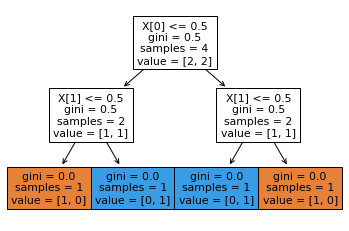

In [22]:
tree_default = DecisionTreeClassifier(min_impurity_decrease=0)
tree_default.fit(XOR[['A','B']], XOR.xor)
plot_tree(tree_default,label='all',filled=True)
plt.show()

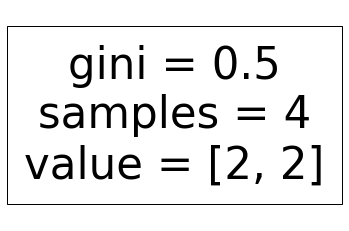

In [44]:
tree_a = DecisionTreeClassifier(min_impurity_decrease=10**-5)
tree_a.fit(XOR[['A','B']], XOR.xor)
plot_tree(tree_a,filled=True)
plt.show()

We notice that the tree with min impurity decrease = 10^-5 is just a stump, while the one with zero min decrease fully maps out the training data. Why?

Let's compute difference of the impurities. Denote $G_0$ the impurity at the initial node. Then $G_0 = 0.5$ Let's compute the impurity after the first split, call it $G_1$.
$$G_1 = \frac{1}{2}\times 0.5 + \frac{1}{2}\times0.5 = 0.5 .$$
So the impurity decrease is $\Delta\operatorname{impurity}=0.5- 0.5 = 0.$ Since the second case we have asked for a minimum impurity $>0$ the tree is left at the stump level. 

The example above demonstrates how an ill set `min_impurity_decrease` can work against us by not allowing the exploration of the tree at depths we would like to see.



### Minimum impurity decrease can shorten branches differently

This example shows how `min_impurity_decrease` works by shortening the tree but not cutting across as `max_depth`. Instead it will make some branches shorter while allowing others to be longer.

We train and plot two different trees, `tree_1` and `tree_2`, using different values for the minimum impurity decrease parameter. We see that the larger value gives shorter branches but the cut happens unevenly, allowing some branches to extend longer.

In [24]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

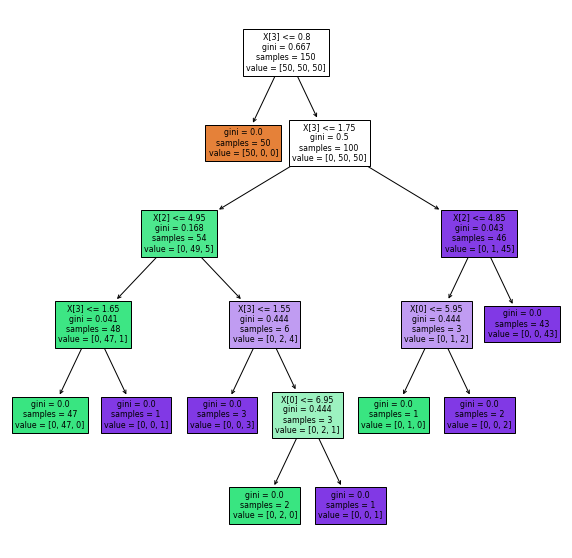

In [42]:
tree_1 = DecisionTreeClassifier(min_impurity_decrease=0.001)
tree_1.fit(X,y)
plt.figure(figsize=(10,10))
plot_tree(tree_1,label='all', filled=True)
plt.show()

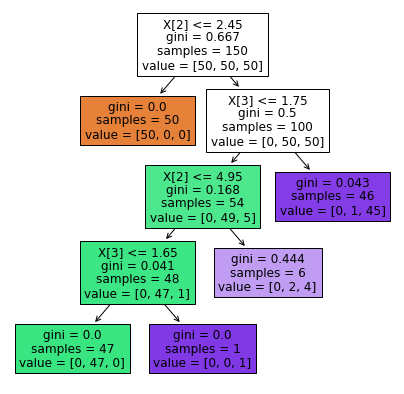

In [43]:
tree_2 = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_2.fit(X,y)
plt.figure(figsize=(7,7))
plot_tree(tree_2,label='all', filled=True)
plt.show()